# Creating and applying image filters

In [1]:
# Third party libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Import local module
from multyscale import filters

## Example stimulus
The example stimulus that this tutorial uses is a version of White's (1979) classic illusion, as also used by Robinson, Hammon, & de Sa (2007).
This stimulus is stored as an `.png` file, so it is first loaded in using `PIL` and converted to grayscale,
and then cast as a numpy NDArray.
The image 1024x1024 pixels represent 32x32 degrees of the visual field,
so, if centered, the visual extent of this stimulus subtends
from -16 degrees on the left, to 16 degrees on the right,
and from -16 degrees on top, to 16 degrees on the bottom.

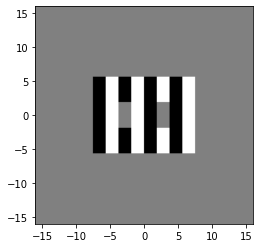

In [2]:
stimulus = np.asarray(Image.open("example_stimulus.png").convert("L"))
shape = stimulus.shape  # filtershape, in pixels
# visual extent, in degrees visual angle,
# same convention as pyplot (left, right, top, bottom):
visextent = (-16, 16, -16, 16)

plt.imshow(stimulus, cmap='gray', extent=visextent)

## Image space
To construct any filters, first the coordinates of the space must be defined.
Here, the stimulus is said to subtend 32x32 degrees of visual extent, and has a resolution of 1024x1024 pixels.
The horizontal (`axish`) and vertical (`axisv`) axes of the space, then, sample the range set by the limits of the visual extent, in 1024 steps.
The numpy.meshgrid function then gives arrays with the `x` and `y` coordinate, in degrees of visual angle, of each of the 1024x1024 pixels in the space.

Defining the coordinates in degrees of visual angle allows for defining all other space quantities also in degrees.
If, instead, the coordinates are in pixels, all other quantities (e.g., standard deviations of filters), must also be given in pixels.

In [3]:
axish = np.linspace(visextent[0], visextent[1], shape[0])
axisv = np.linspace(visextent[2], visextent[3], shape[1])

(x, y) = np.meshgrid(axish, axisv)

## Filter types
The [multyscale.filters](../reference/multyscale.filters.rst) module implements several filter types:

- `multyscale.filters.gaussian2d`: a two-dimensional Gaussian filter, which has a standard deviation along a major and minor axis, and optionally a rotation
- `multyscale.filters.dog`: a isotropic difference-of-Gaussian filter, composed of a center 2D Gaussian and a surround 2D Gaussian, that are each symmetrical (i.e., standard deviation along major and minor axes are identical)
- `multyscale.filters.odog`: an oriented difference-of-Gaussian filter, composed of a center 2D Gaussian and  a surround 2D Gaussian, which do not have to be isotropic (i.e., can have different standard deviations along their major and minor axes).

### Two-dimensional Gaussian
The two-dimensional Gaussian is evaluate over the whole input space, i.e., for each coordinate in `x` and `y`.
The shape of a Gaussian is generally defined by two parameters: its central tendency, and its spread.
For a 2D Gaussian in space, this corresponds to the `center` location,
and the standard deviation `sigma`.
The present implementation of the Gaussian defaults to `center`ing on `(0,0)`.

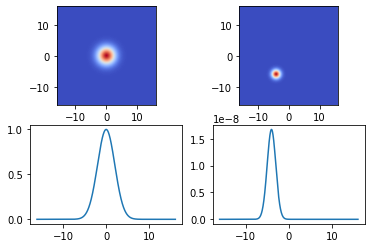

In [4]:
img = filters.gaussian2d(x, y, sigma=2)
img2 = filters.gaussian2d(x,y, sigma=1, center=(-4,6))

# Plot
plt.subplot(2, 2, 1)
plt.imshow(img, extent=visextent, cmap="coolwarm")
plt.subplot(2, 2, 2)
plt.imshow(img2, extent=visextent, cmap="coolwarm")

# Plot horizontal meridians
plt.subplot(2, 2, 3)
plt.plot(x[int(img.shape[0] / 2)], img[int(img.shape[0] / 2), ...])
plt.subplot(2, 2, 4)
plt.plot(x[int(img2.shape[0] / 2)], img2[int(img2.shape[0] / 2), ...])

### Difference-of-Gaussian
A common type of filter of image processing, is the difference-of-Gaussian (DoG) filter.
As the name implies, it consists of two, 2D Gaussian filters:
a smaller "center" Gaussian, and a larger "surround" Gaussian,
and the filter subtracts the surround Gaussian from the center Gaussian.

For an isotropic DoG filter only one standard deviation is required for each of the constituent Gaussians.
These filters are radially symmetric, and therefore considered _unoriented_ DoG filters.

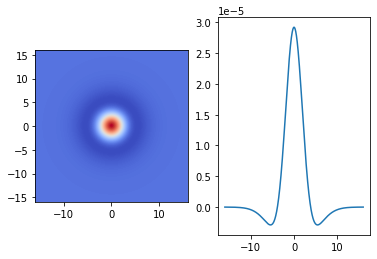

In [5]:
img = filters.dog(x, y, sigma=(2,4)) # surround Gaussian is 2:1 of center gaussian

# Plot
plt.subplot(1, 2, 1)
plt.imshow(img, extent=visextent, cmap="coolwarm")

# Plot horizontal meridian
plt.subplot(1, 2, 2)
plt.plot(x[int(img.shape[0] / 2)], img[int(img.shape[0] / 2), ...])

### Oriented 2D Gaussian
The previous filters are isotropic: they are radially symmetric and thus _unoriented_.
This is because the 2D Gaussian(s) have the same standard deviation along both axes.
However, this is not required.
_Oriented_ 2D Gaussians can be made by differing the standard deviation along the two axes.
Optionally, the major and minor axes of the Gaussian can be rotated away from the horizontal and vertical axes.

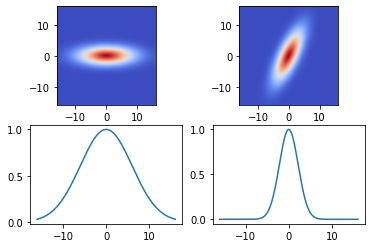

In [6]:
img = filters.gaussian2d(x, y, sigma=(6, 2))
img2 = filters.gaussian2d(x, y, sigma=(6, 2), orientation=65) # rotation is counterclockwise

# Plot
plt.subplot(2, 2, 1)
plt.imshow(img, extent=visextent, cmap="coolwarm")
plt.subplot(2, 2, 2)
plt.imshow(img2, extent=visextent, cmap="coolwarm")

# Plot horizontal meridian
plt.subplot(2, 2, 3)
plt.plot(x[int(img.shape[0] / 2)], img[int(img.shape[0] / 2), ...])
plt.subplot(2, 2, 4)
plt.plot(x[int(img2.shape[0] / 2)], img2[int(img2.shape[0] / 2), ...])

### Oriented Difference-of-Gaussian
A difference-of-Gaussian filter also does not have to be isotropic.
If at least one of the constituent Gaussians (center or surround) is oriented,
so will the combined filter be.
This filter now is an _oriented_ difference-of-Gaussians (ODoG) filter.

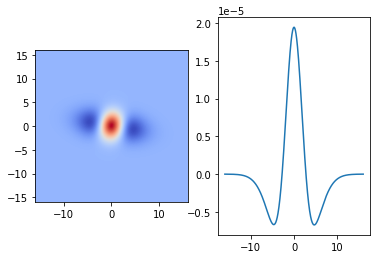

In [7]:
sigma = ((2, 2), (2, 4))  # surround Gaussian is 2:1 in one axis
img = filters.odog(x, y, sigma, orientation=80)

# Plot filter + horizontal meridian
plt.subplot(1, 2, 1)
plt.imshow(img, extent=visextent, cmap="coolwarm")
plt.subplot(1, 2, 2)
plt.plot(x[int(img.shape[0] / 2)], img[int(img.shape[0] / 2), ...])

## Applying filters

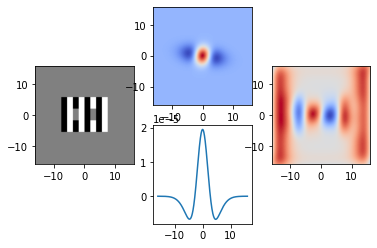

In [8]:
img = filters.odog(x, y, sigma=((2, 2), (2, 4)), orientation=80)

# % Apply filter
filt_img = filters.apply(stimulus, img)

# Plot stimulus
plt.subplot(1, 3, 1)
plt.imshow(stimulus, cmap="gray", extent=visextent)

# Plot filter + horizontal meridian
plt.subplot(2, 3, 2)
plt.imshow(img, extent=visextent, cmap="coolwarm")
plt.subplot(2, 3, 5)
plt.plot(x[int(img.shape[0] / 2)], img[int(img.shape[0] / 2), ...])

# Plot filtered image
plt.subplot(1, 3, 3)
plt.imshow(filt_img, cmap="coolwarm", extent=visextent)